In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import keras
from keras.applications.vgg16 import VGG16

img = 'examples/cat_dog.jpg'

Using TensorFlow backend.


In [3]:
vgg16 = VGG16(include_top=True, weights='imagenet', classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


Predicted class:
bull_mastiff (n02108422) with probability 0.41
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool 

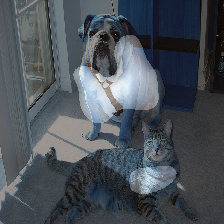

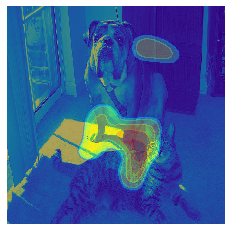

In [27]:
import eli5

e = eli5.explain_prediction(vgg16, 'examples/cat_dog.jpg')
eli5.formatters.image.format_as_image(e)

KeyboardInterrupt: 

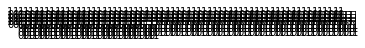

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import PIL

imgarr = img_to_array(load_img('examples/cat_dog.jpg'), dtype='uint64')
# img = array_to_img(imgarr)
# img = img.resize((64, 64), resample=PIL.Image.BILINEAR)
# img = PIL.Image.fromarray(imgarr)
fig, ax = plt.subplots(nrows=64, ncols=64)
ax.axis('off')
ax.imshow(imgarr, interpolation='bilinear')

In [6]:
import numpy as np
a = np.array([1, 2])
print(a/2)
print(a//2)

[0.5 1. ]
[0 1]


In [27]:
import numpy as np
a = np.array([[13, 21], [21, 43]])
print(a.shape)
a = np.expand_dims(a, axis=-1)
print(a.shape)
print(a[:,:,0].shape)

(2, 2)
(2, 2, 1)
(2, 2)


In [29]:
from IPython.core.display import display, HTML
display(HTML('<img src="./examples/cat_dog.jpg"></img>'))

In [30]:
%%html
<canvas id="myCanvas" width="200" height="100" style="border:1px solid #000000;">
     var c = document.getElementById("myCanvas");
    var ctx = c.getContext("2d");
    ctx.moveTo(0, 0);
    ctx.lineTo(200, 100);
    ctx.stroke(); 
</canvas>

In [32]:
%%html
'<img src="./examples/cat_dog.jpg" width=224 height=224></img>

import tensorflow as tf
import numpy as np
a = np.array([2, 3])
b = np.array([4, 5])
with tf.Session().as_default():
    print(tf.multiply(a, b).eval())
print(a*b)

In [12]:
from eli5.base import Explanation
e = Explanation('blabla', image='img', heatmap='hm')

In [13]:
import eli5
eli5.explain_prediction('blabla', 'eg')

Explanation(estimator="'blabla'", description=None, error="estimator 'blabla' is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None, heatmap=None)

In [14]:
import eli5
eli5.explain_weights('blabla')

Explanation(estimator="'blabla'", description=None, error="estimator 'blabla' is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None, heatmap=None)

In [15]:
import eli5
eli5.explain_weights_sklearn('blabla')

Explanation(estimator="'blabla'", description=None, error="estimator 'blabla' is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None, heatmap=None)

In [16]:
import eli5
eli5.explain_prediction_sklearn('blabla', 'aha')

Explanation(estimator="'blabla'", description=None, error="estimator 'blabla' is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None, heatmap=None)